In [ ]:
"""
CSCI 680-0K11 - Assignment 4 - Fall 2019

Author:   Sneha Ravi Chandran
Z-ID:     Z1856678
Date Due: November 18, 2019 at 11:59pm

Purpose:  To implement the data augmentation techiniques to the dataset using 
          TensorFlow/ Keras. The feature extractors used are MobileNet, 
          ResNet V2 50, ResNet V2 101.

"""

'\nCSCI 680-0K11 - Assignment 4 - Fall 2019\n\nAuthor:   Sneha Ravi Chandran\nZ-ID:     Z1856678\nDate Due: November 18, 2019 at 11:59pm\n\nPurpose:  To implement the data augmentation techiniques to the dataset using \n          TensorFlow/ Keras. The feature extractors used are MobileNet, \n          ResNet V2 50, ResNet V2 101.\n\n'

Importing the packages

In [ ]:
# Importing Tensorflow and keras libraries and packages necessary to build the model
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

Loading the Data

In [ ]:
# Downloading Dog vs Cat data and storing them in train_dir and validation_dir separetly 

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

68608000/68606236 [==============================] - 1s 0us/step


Data Preparation

In [ ]:
batch_size = 128                                                                # number of samples that will be generated throw the network is set to 128
epochs = 10                                                                     # we iterate through 10 times by setting the value of epoch to 10
IMG_HEIGHT = 160                                                                # images height set to 160
IMG_WIDTH = 160                                                                 # image width is set to 160

# Below we have created first ImageDataGenerator which has no data augmentation.
train_image_generator = ImageDataGenerator(rescale=1./255)                      # Generator for our training data scaled
validation_image_generator = ImageDataGenerator(rescale=1./255)                 # Generator for our validation data scaled

''' target_size	will resized the image to the specified dimension 
    batch_size of 128 and its default is 32
    class_mode can take categorical, binary or sparse value. binary will be 1D binary labels
    shuffle takes a boolean default value as TRUE
'''
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Creating a Convolution model

In [ ]:
'''
The model has 3 convolution network with max pooling to each of the layer. Fully 
connected layer of 512 units along with activation function as relu and signmoid
before the output layer.
'''
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
            input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Compile the Model and Print the Summary




In [ ]:
'''
  Compile the model with the optimizer having adaptive moment estimation, loss 
  function as binary_crossentropy and accuracy metrics argument
'''
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()                                                                 # Printing summary of the model

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
____________________________

Train the model

In [ ]:
# use fit_generator from ImageDataGenerator to train the model
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=val_data_gen
                              )

Epoch 1/10
16/16 [==============================] - 40s 3s/step - loss: 1.0949 - acc: 0.4930 - val_loss: 0.6894 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 37s 2s/step - loss: 0.6805 - acc: 0.5275 - val_loss: 0.6590 - val_acc: 0.6310
Epoch 3/10
16/16 [==============================] - 37s 2s/step - loss: 0.6513 - acc: 0.6010 - val_loss: 0.6336 - val_acc: 0.6320
Epoch 4/10
16/16 [==============================] - 37s 2s/step - loss: 0.6056 - acc: 0.6665 - val_loss: 0.5971 - val_acc: 0.6800
Epoch 5/10
16/16 [==============================] - 37s 2s/step - loss: 0.5463 - acc: 0.7390 - val_loss: 0.5731 - val_acc: 0.7000
Epoch 6/10
16/16 [==============================] - 37s 2s/step - loss: 0.4932 - acc: 0.7690 - val_loss: 0.5724 - val_acc: 0.7050
Epoch 7/10
16/16 [==============================] - 37s 2s/step - loss: 0.4723 - acc: 0.7715 - val_loss: 0.5765 - val_acc: 0.6970
Epoch 8/10
16/16 [==============================] - 37s 2s/step - loss: 0.4137 - acc: 0.81

Visualizing the Results

In [ ]:
# Plotting Resulting Accuracy and Loss
def plot_accuracy_loss(history, epochs):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

**Model without augmentation:**


> The accuracy of the training and validation differ a lot and the graph seem to diverge more explaining overfitting. The validation accuracy is around 71% with that of the training accuracy having 86%. Looking at the accuracy curve, we can conclude that training seems to increase while the validation on the other hand seem to be hindering close to about 70%



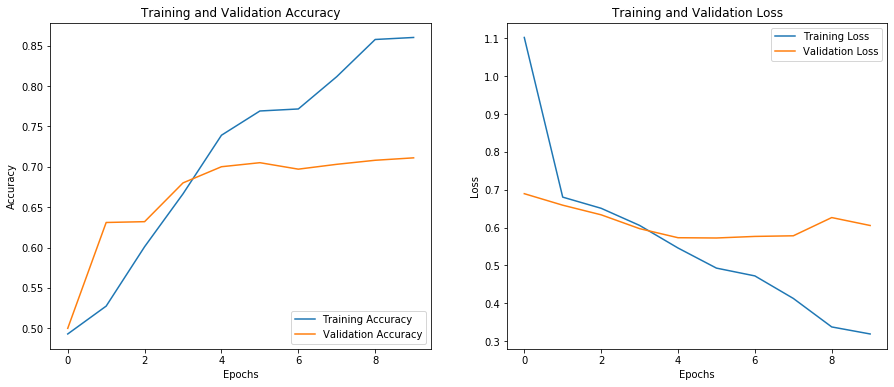

In [ ]:
plot_accuracy_loss(history, epochs)                                             # Plotting Resulting Accuracy and Loss

Data Augmentation

In [ ]:
'''
Combining Various Data Augmentations like Flipping Images Horizontally by setting
it to True, Image rotation by 45 degree, Range for random zoom is 50, fraction 
of total height, fraction of total width
'''
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
'''
Applying dropout of 0.2 to the first and last max pool layer in the convolution
model to reduce from overfitting
'''
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
          input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
'''
  Compile the model with the optimizer having adaptive moment estimation, loss 
  function as binary_crossentropy and accuracy metrics
'''
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()                                                                 # Printing summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [ ]:
# use fit_generator from ImageDataGenerator to train the model
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=val_data_gen
                              )

Epoch 1/10
16/16 [==============================] - 43s 3s/step - loss: 0.6828 - acc: 0.5950 - val_loss: 0.6178 - val_acc: 0.6630
Epoch 2/10
16/16 [==============================] - 41s 3s/step - loss: 0.6228 - acc: 0.6445 - val_loss: 0.5853 - val_acc: 0.6780
Epoch 3/10
16/16 [==============================] - 41s 3s/step - loss: 0.5953 - acc: 0.6840 - val_loss: 0.5636 - val_acc: 0.6960
Epoch 4/10
16/16 [==============================] - 41s 3s/step - loss: 0.5940 - acc: 0.6950 - val_loss: 0.5691 - val_acc: 0.7000
Epoch 5/10
16/16 [==============================] - 40s 3s/step - loss: 0.5905 - acc: 0.6860 - val_loss: 0.5403 - val_acc: 0.7280
Epoch 6/10
16/16 [==============================] - 41s 3s/step - loss: 0.5793 - acc: 0.6995 - val_loss: 0.5634 - val_acc: 0.6860
Epoch 7/10
16/16 [==============================] - 41s 3s/step - loss: 0.5806 - acc: 0.6990 - val_loss: 0.5864 - val_acc: 0.6850
Epoch 8/10
16/16 [==============================] - 40s 3s/step - loss: 0.5814 - acc: 0.69

**Model with data augmentation:**


> In order to improve the accuracy from the previous model we augment the data using random transformations. Although the training and validation accuracy do not differ by a lot they are 71% and 73% respectively which can be improved further as well. In this model we have put dropout to reduce overfitting and done data augmentation techniques like Flipping Images Horizontally by setting
it to True, Image rotation by 45 degree, Range for random zoom is 50, fraction of total height, fraction of total width thereby resulting in more samples to work with. Looking at the loss and accuracy curve it is less overfitting in comparision with the previous model. 

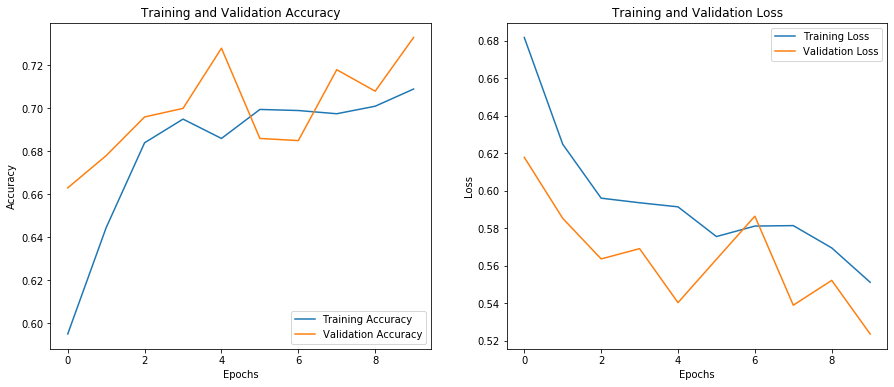

In [ ]:
plot_accuracy_loss(history, epochs)                                             # Plotting Resulting Accuracy and Loss

MobileNet

In [ ]:
# MobileNet
train_img_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45, 
                                   width_shift_range=.15, 
                                   height_shift_range=.15, 
                                   horizontal_flip=True, 
                                   zoom_range=0.5)

train_data_gen = train_img_gen.flow_from_directory(train_dir, 
                                                   target_size=(224, 224), 
                                                   batch_size=32, 
                                                   class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, 
                                               target_size=(224, 224), 
                                               batch_size=32, 
                                               class_mode='binary', shuffle=True)

# Model Creation
conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=(224, 224, 3))
])

conv_feature_extractor.trainable = False

mobile_net = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(1, activation='sigmoid')
                      ])

mobile_net.summary()                                                            # printing the summary of the model

mobile_net.compile(optimizer='adam',                                            # Model Compilation and Fitting
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

history = mobile_net.fit_generator(train_data_gen,
                                   epochs=10,
                                   validation_data= val_data_gen)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 83s 1s/step - loss: 0.3548 - acc: 0.8400 - val_loss: 0.1199 - val_acc: 0.9720
Epoch 2/10
63/63 [==============================] - 80s 1s/step - loss: 0.1649 - acc: 0.9390 - val_loss: 0.0794 - val_acc: 0.9770
Epoch 3/10
63/63 [==============================] - 80s 1s/step - loss: 0.1313 - acc: 0.9460 - val_loss: 0.0739 - val_acc: 0.9800
Epoch 4/10
63/63 [==========

**MobileNet**

> The Accuracy and Loss curve for Traininig and validation is relatively not overfititng compared to the previous model and the accuracy rate is also high.



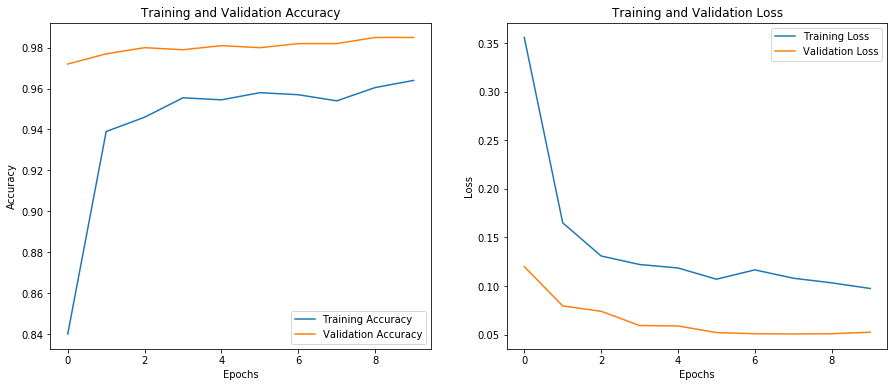

In [ ]:
plot_accuracy_loss(history, 10)                                             # plotting Resulting Accuracy and Loss for mobile net

 ResNet v2 50

In [ ]:
train_img_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45, 
                                   width_shift_range=.15, 
                                   height_shift_range=.15, 
                                   horizontal_flip=True, 
                                   zoom_range=0.5)

train_data_gen = train_img_gen.flow_from_directory(train_dir, 
                                                   target_size=(224, 224), 
                                                   batch_size=32, 
                                                   class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, 
                                               target_size=(224, 224), 
                                               batch_size=32, 
                                               class_mode='binary', shuffle=True)

# Model Creation

conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4', input_shape=(224, 224, 3))
])

conv_feature_extractor.trainable = False

resnet_v2_50 = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(1, activation='sigmoid')
                      ])

resnet_v2_50.summary()

### Model Compilation and Fitting

resnet_v2_50.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

history = resnet_v2_50.fit_generator(train_data_gen,
                                   epochs=10,
                                   validation_data=val_data_gen)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 1001)              25615849  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1002      
Total params: 25,616,851
Trainable params: 1,002
Non-trainable params: 25,615,849
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 258s 4s/step - loss: 0.3519 - acc: 0.8465 - val_loss: 0.0779 - val_acc: 0.9730
Epoch 2/10
63/63 [==============================] - 254s 4s/step - loss: 0.1499 - acc: 0.9450 - val_loss: 0.0614 - val_acc: 0.9820
Epoch 3/10
63/63 [==============================] - 253s 4s/step - loss: 0.1216 - acc: 0.9530 - val_loss: 0.0448 - val_acc: 0.9860
Epoch 4/10
63/63 [=====

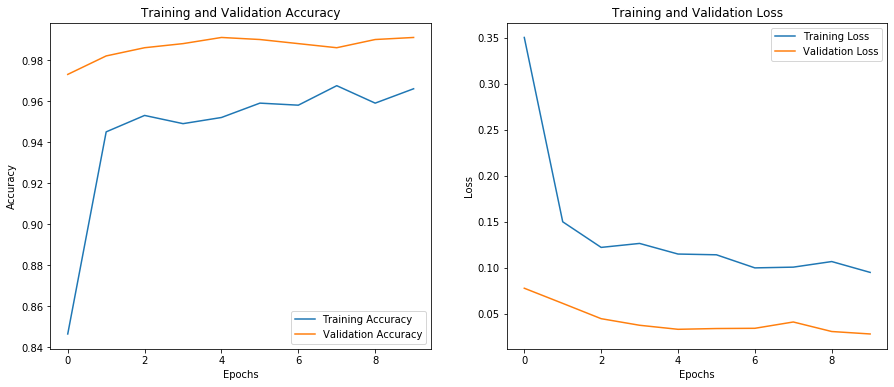

In [ ]:
plot_accuracy_loss(history, 10)                                                 # Plotting Resulting Accuracy and Loss ResNet V2 50

ResNet V2 101

In [ ]:
train_img_gen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45, 
                                   width_shift_range=.15, 
                                   height_shift_range=.15, 
                                   horizontal_flip=True, 
                                   zoom_range=0.5)

train_data_gen = train_img_gen.flow_from_directory(train_dir, 
                                                   target_size=(224, 224), 
                                                   batch_size=32, 
                                                   class_mode='binary')

val_img_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = val_img_gen.flow_from_directory(validation_dir, 
                                               target_size=(224, 224), 
                                               batch_size=32, 
                                               class_mode='binary', shuffle=True)

# Model Creation

conv_feature_extractor = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4', input_shape=(224, 224, 3))
])

conv_feature_extractor.trainable = False

resnet_v2_101 = tf.keras.Sequential([
                       conv_feature_extractor,
                       Dense(1, activation='sigmoid')
                      ])

resnet_v2_101.summary()

### Model Compilation and Fitting

resnet_v2_101.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

history = resnet_v2_101.fit_generator(train_data_gen,
                                   epochs=10,
                                   validation_data=val_data_gen)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 1001)              44677609  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1002      
Total params: 44,678,611
Trainable params: 1,002
Non-trainable params: 44,677,609
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 486s 8s/step - loss: 0.3723 - acc: 0.8545 - val_loss: 0.0790 - val_acc: 0.9650
Epoch 2/10
63/63 [==============================] - 478s 8s/step - loss: 0.1487 - acc: 0.9420 - val_loss: 0.0565 - val_acc: 0.9750
Epoch 3/10
63/63 [==============================] - 482s 8s/step - loss: 0.1253 - acc: 0.9480 - val_loss: 0.0449 - val_acc: 0.9870
Epoch 4/10
63/63 [=====

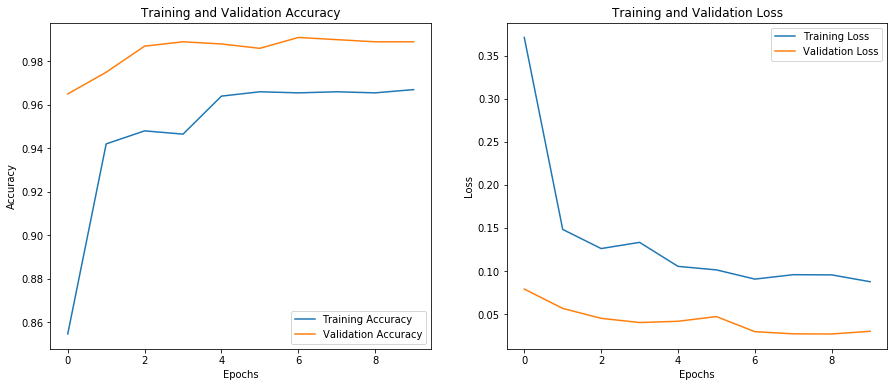

In [ ]:
plot_accuracy_loss(history, 10)                                                 # Plotting Resulting Accuracy and Loss of ResNet V2 101

**Summary of MobileNet, ResNet V2 50 and ResNet V2 101**

> The Accuracy and Loss curve for Training and validation is not overfittitng or underfitting compared to the previous models and the accuracy rate is also high. The Residual Networks has better accuracy than MobileNet(which in turn is better than the initial with and without augmentated model) for the training and validation set although not very significantly different from each other.

